# TP53 Analysis

In [2]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

Import CPTAC data

In [3]:
import CPTAC

Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Data...

 ******PLEASE READ******


In [4]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

Test for protein levels (mutation in a gene with protein levels of any protein)

In [13]:
gene = 'ATM'
protList = ['ATM']

pcutoff = 0.05/len(protList)
print(pcutoff)

genedf = somatic_mutations[gene].to_frame()
for protein in protList:
    if protein in proteomics.columns:
        proteindf = proteomics[protein].to_frame()
        cross = genedf.add(proteindf, fill_value=0).dropna(axis=0)
        mutated = cross.loc[cross[gene] == 1.0]
        wt = cross.loc[cross[gene] == 0.0]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        print("Test for " + protein + ": ")
        print(ttest)

0.05
Test for ATM: 
Ttest_indResult(statistic=nan, pvalue=nan)


[Text(0,0.5,'Proteomics'), Text(0.5,0,'Somatic Gene Mutation')]

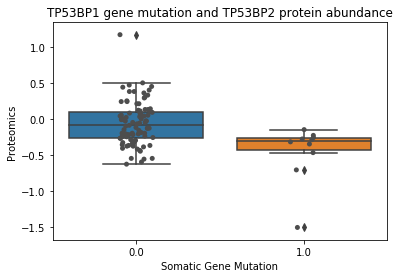

In [10]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=protList[0])
somatic_boxplot.set_title(gene + " gene mutation and " + protList[0] + " protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=protList[0],jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")

In [7]:
gene = 'TP53'
sites = phos.filter(regex='TP53')
sigResults = [];

genedf = somatic_mutations[gene].to_frame()
cross = genedf.add(sites, fill_value=0)
mutated = cross.loc[cross[gene] == 1.0]
wt = cross.loc[cross[gene] == 0.0]

pcutoff = 0.05/len(cross.columns)
print(pcutoff)

for loc in cross.columns:
    if not loc == gene:
        mutsitedf = mutated[[gene, loc]].dropna()
        wtsitedf = wt[[gene, loc]].dropna()
        ttest = scipy.stats.ttest_ind(mutsitedf[loc], wtsitedf[loc])
        if ttest[1] <= pcutoff:
            sigResults.append(loc)
            print('Results for ' + loc + ': ')
            print(ttest)

0.0005376344086021505
Results for TP53-S315: 
Ttest_indResult(statistic=4.5116732692720705, pvalue=2.81407273681229e-05)
Results for TP53BP1-S1431: 
Ttest_indResult(statistic=4.819602521158986, pvalue=6.619797586243582e-06)
Results for TP53BP1-S1435: 
Ttest_indResult(statistic=4.74121449433656, pvalue=7.210127219127611e-06)
Results for TP53BP1-S1683: 
Ttest_indResult(statistic=4.687964245279931, pvalue=9.535677192577145e-06)
Results for TP53BP1-S1706: 
Ttest_indResult(statistic=5.643489011660524, pvalue=3.294769768234183e-07)
Results for TP53BP1-S1763: 
Ttest_indResult(statistic=7.045858275075653, pvalue=7.196228903923844e-10)
Results for TP53BP1-S1764: 
Ttest_indResult(statistic=4.387625978778714, pvalue=3.4228154547355373e-05)
Results for TP53BP1-S867: 
Ttest_indResult(statistic=4.364161237074746, pvalue=5.013280141618629e-05)


[Text(0,0.5,'Phosphoproteomics'), Text(0.5,0,'Somatic Gene Mutation')]

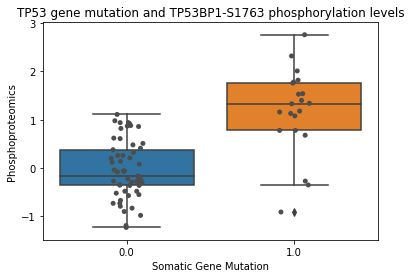

In [8]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=sigResults[5])
somatic_boxplot.set_title(gene + " gene mutation and " + sigResults[5] + " phosphorylation levels")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=sigResults[5],jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Phosphoproteomics")